## Simple CNN for Edgelovers
In this notebook you train a very simple CNN with only 1 kernel to discriminate images containing vertical (y=0) from those containing horizontal stripes (y=1). You can use keras for the solution.

### a) Generation of the data
Write a function which creates an artficially dataset of greyscale images (50x50 pixel) with 10 vertical or horizontal bars (10 pixel long). Use this function to create a training and validation dataset of 1000 examples each.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical

In [2]:
def data_generation(number, x, y, bar_length, bar_number):
    data = np.zeros(shape=(number, x, y, 1))
    labels = np.zeros(shape=(number))
    for i in range(number):
        orientation = np.random.randint(0,2)
        image = np.random.random((x,y,1))*128
                      
        if orientation:
            label = 0.0
            for j in range(bar_number):
                x1 = np.random.randint(2, x)
                y1 = np.random.randint(2, y - 10)
                y2 = y1 + bar_length
                image[y1:y2, x1] = 255.0
        else:
            label = 1.0
            for j in range(bar_number):
                y1 = np.random.randint(2, x -10)
                x1 = np.random.randint(2, y)
                x2 = x1 + bar_length
                image[y1,x1:x2] = 255.0
        data[i] = image.copy()
        labels[i] = label
        return data, labels

In [3]:
train_data, train_label = data_generation(1000, 50,50, 10, 10)

In [4]:
val_data, val_label = data_generation(1000, 50,50, 10, 10)

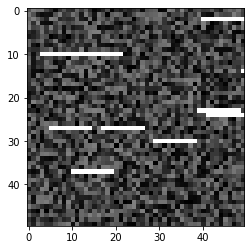

In [5]:
img = train_data[0, :, :, 0]
plt.imshow(img, cmap='gray')

### b) Build the simplest possible CNN
Make a CNN with one convolution (5x5, haveing two outputs (one for horizontal, one for vertical). Train the CNN on the data from a). You should have at max trainable 32 parameters in the network.

- Plot the learning curves: (epochs vs training loss and validation loss) and epochs vs accuracy.You should get an accuracy of approximatly 1.

Hint: Use the max-pooling operation in a clever way.

In [9]:
kernel = 2
epochs = 100
bs = 5
eta = 0.1

model = Sequential()
model.add(Conv2D(kernel, kernel_size=5, strides=2, activation='relu', input_shape=(50, 50, 1)))
model.add(MaxPooling2D(pool_size=8, strides=8))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer="adam", loss='binary_crossentropy', lr=eta, metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 23, 23, 2)         52        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 2)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(train_data, train_label, batch_size=bs, epochs=epochs, validation_data=(val_data, val_label));

Train on 1000 samples, validate on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.9938 - accuracy: 0.9990 - val_loss: 0.5995 - val_accuracy: 1.0000
Epoch 2/100
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.8616 - accuracy: 0.9990 - val_loss: 0.5199 - val_accuracy: 1.0000
Epoch 3/100
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.7392 - accuracy: 0.9990 - val_loss: 0.4520 - val_accuracy: 1.0000
Epoch 4/100
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6249 - accuracy: 0.9990 - val_loss: 0.3942 - val_accuracy: 1.0000
Epoch 5/100
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.5182 - accuracy: 0.9990 - val_loss: 0.3449 - val_accuracy: 1.0000
Epoch 6/100
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4311 - accuracy: 0.9990 - val_loss: 0.3028 - val_accuracy: 1.0000
Epoch 7/100
1000/1000 [==============================] - 1s 1ms/sample

Epoch 56/100
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0160 - val_accuracy: 0.9990
Epoch 57/100
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0158 - val_accuracy: 0.9990
Epoch 58/100
1000/1000 [==============================] - 1s 952us/sample - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0155 - val_accuracy: 0.9990
Epoch 59/100
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0152 - val_accuracy: 0.9990
Epoch 60/100
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0150 - val_accuracy: 0.9990
Epoch 61/100
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0148 - val_accuracy: 0.9990
Epoch 62/100
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0018 - accuracy: 1.0000 - va

### c) Visualize the learned kernel
Visualize the learned kernel, you might want to use model.get_weights(). Does the learned kernel makes sense?